In [8]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


base_dir = os.path.join(os.getcwd(), 'cats_and_dogs_filtered')

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

print(f"Procurando dados em: {base_dir}")

if os.path.exists(train_cats_dir):
    print(f"Total de gatos no treino: {len(os.listdir(train_cats_dir))}")
    print(f"Total de cachorros no treino: {len(os.listdir(train_dogs_dir))}")
else:
    print(f"O Python está procurando neste local exato: {base_dir}")
    print("Certifique-se de que a pasta 'cats_and_dogs_filtered' está no mesmo lugar que este arquivo .py ou .ipynb")

Procurando dados em: /home/ygabsxw/projects/IA/listaExtra02/cats_and_dogs_filtered
Total de gatos no treino: 1000
Total de cachorros no treino: 1000


In [9]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,        
    rotation_range=40,     
    width_shift_range=0.2, 
    height_shift_range=0.2,
    shear_range=0.2,       
    zoom_range=0.2,        
    horizontal_flip=True,  
    fill_mode='nearest'    
)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

print("Carregando imagens de treino...")
train_generator = train_datagen.flow_from_directory(
    train_dir,              
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'    
)

print("Carregando imagens de validação...")
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
    shuffle=False 
)

Carregando imagens de treino...
Found 2000 images belonging to 2 classes.
Carregando imagens de validação...
Found 1000 images belonging to 2 classes.


In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(512, activation='relu'),

    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), 
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,  
    epochs=20,           
    validation_data=validation_generator,
    validation_steps=50,  
    verbose=1
)

Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 152ms/step - accuracy: 0.5055 - loss: 0.6953 - val_accuracy: 0.5160 - val_loss: 0.6910
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 137ms/step - accuracy: 0.5495 - loss: 0.6875 - val_accuracy: 0.5020 - val_loss: 0.6858
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 136ms/step - accuracy: 0.5500 - loss: 0.6852 - val_accuracy: 0.5270 - val_loss: 0.6727
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 135ms/step - accuracy: 0.5920 - loss: 0.6639 - val_accuracy: 0.6600 - val_loss: 0.6234
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 137ms/step - accuracy: 0.6385 - loss: 0.6364 - val_accuracy: 0.6140 - val_loss: 0.6400
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 136ms/step - accuracy: 0.6485 - loss: 0.6266 - val_accuracy: 0.6900 - val_loss: 0.5825
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 141ms/step - accuracy: 0.6775 - loss: 0.5960 - val_accuracy: 0.6940 - val_loss: 0.5716
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 137ms/step - accuracy: 0.6845 - loss: 0

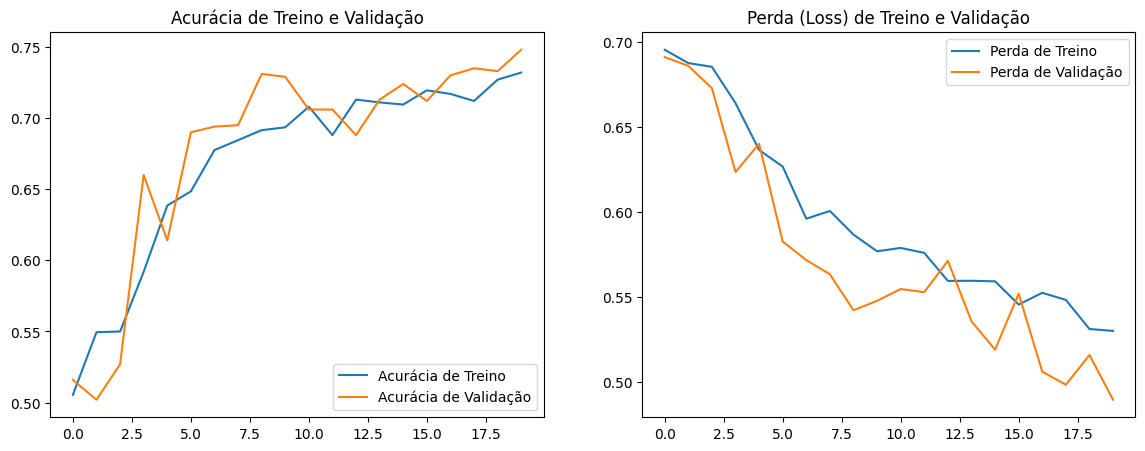

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Acurácia de Treino')
plt.plot(epochs_range, val_acc, label='Acurácia de Validação')
plt.legend(loc='lower right')
plt.title('Acurácia de Treino e Validação')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Perda de Treino')
plt.plot(epochs_range, val_loss, label='Perda de Validação')
plt.legend(loc='upper right')
plt.title('Perda (Loss) de Treino e Validação')

plt.show()

In [13]:
from sklearn.metrics import classification_report, confusion_matrix

validation_generator.reset()

Y_pred = model.predict(validation_generator)
y_pred = (Y_pred > 0.5).astype(int) 

y_true = validation_generator.classes

print('Matriz de Confusão')
print(confusion_matrix(y_true, y_pred))

print('\nRelatório de Classificação')
target_names = ['Gato', 'Cachorro']
print(classification_report(y_true, y_pred, target_names=target_names))

50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step
Matriz de Confusão
[[364 136]
 [116 384]]

Relatório de Classificação
              precision    recall  f1-score   support

        Gato       0.76      0.73      0.74       500
    Cachorro       0.74      0.77      0.75       500

    accuracy                           0.75      1000
   macro avg       0.75      0.75      0.75      1000
weighted avg       0.75      0.75      0.75      1000



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


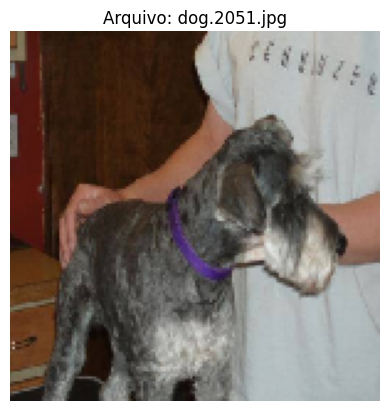


--- RELATÓRIO DA IA ---
🐶 A IA acha que é um CACHORRO! (Certeza: 59.68%)


In [14]:
import random

pasta_teste = os.path.join(validation_dir, 'dogs') 
arquivos = os.listdir(pasta_teste)
arquivo_aleatorio = random.choice(arquivos)
caminho_imagem = os.path.join(pasta_teste, arquivo_aleatorio)

img = tf.keras.utils.load_img(caminho_imagem, target_size=(150, 150))
x = tf.keras.utils.img_to_array(img)
x = np.expand_dims(x, axis=0)
x /= 255.0 

classes = model.predict(x)

plt.imshow(img)
plt.axis('off')
plt.title(f"Arquivo: {arquivo_aleatorio}")
plt.show()

probabilidade = classes[0][0]

print(f"\n--- RELATÓRIO DA IA ---")
if probabilidade > 0.5:
    print(f"🐶 A IA acha que é um CACHORRO! (Certeza: {probabilidade:.2%})")
else:
    print(f"🐱 A IA acha que é um GATO! (Certeza: {1-probabilidade:.2%})")